In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ManifoldSculpting import ManifoldSculpting
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

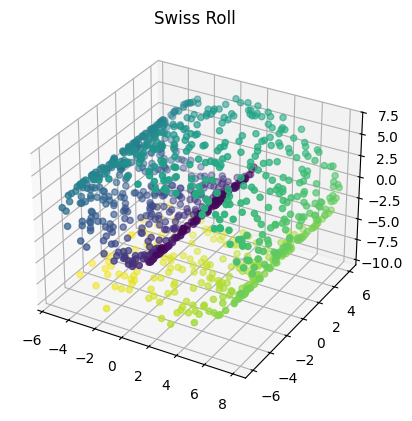

In [2]:
def swiss_roll(n_samples):
	"""
	Parameters:
	n: int
		Number of points to generate
	
	Returns:
	data: np.array
		An array of shape (n, 4) where the first column is the x-coordinate, the second column is the y-coordinate, the third column is the z-coordinate, 
		and the fourth column is the color of the points
	"""

	data = np.zeros((n_samples,4))
	t = np.array([2+8*i/n_samples for i in range(n_samples)])
	data[:,0] = t*np.sin(t)
	data[:,2] = t*np.cos(t)
	data[:,1] = np.random.uniform(-6,6,n_samples)
	data[:,3] = t
	return data

def plot_swiss_roll(X):
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,3], cmap=plt.cm.viridis)
	plt.title("Swiss Roll")
	plt.savefig("img/swiss_roll.png")
	plt.show()

data = swiss_roll(1000)
plot_swiss_roll(data)

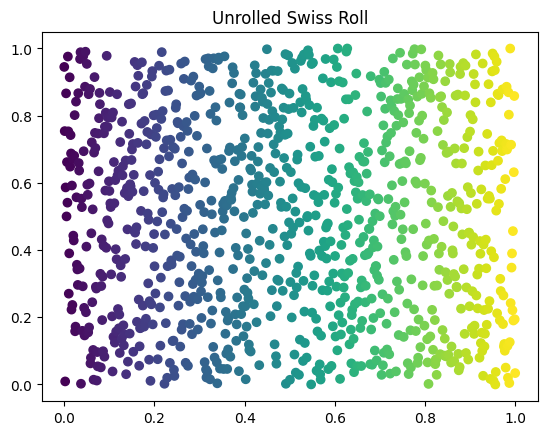

In [9]:
unroll = data.copy()
fig = plt.figure()
# Scale data[:,[3,1]] using min-max scaling
scaler = MinMaxScaler()
unroll[:,[3,1]] = scaler.fit_transform(unroll[:,[3,1]])

# Replot
plt.scatter(unroll[:,3], unroll[:,1], c=unroll[:,3], cmap=plt.cm.viridis)
plt.title("Unrolled Swiss Roll")
plt.savefig("img/unrolled_swiss_roll.png")
plt.show()

In [4]:
# Parameters
n_neighbors = 15

In [5]:
roll = data[:,:3].astype(np.float32)
roll = roll - np.mean(roll,axis=0)
phi = data[:,-1]

In [6]:
ms = ManifoldSculpting(n_neighbors=n_neighbors, sigma=0.98, niter=800, apply_pca=True, patience=100)

y_ms = ms.fit_transform(roll)

print(f'Final mean error: {ms.last_error:.3e}')
print(f'Best mean error: {ms.best_error:.3e}')

Initial adjustment: 228it [04:05,  1.08s/it]
Main loop:  46%|████▋     | 370/800 [02:30<02:54,  2.47it/s] 

Convergence reached by patience
Final mean error: 2.072e-01
Best mean error: 1.150e-01


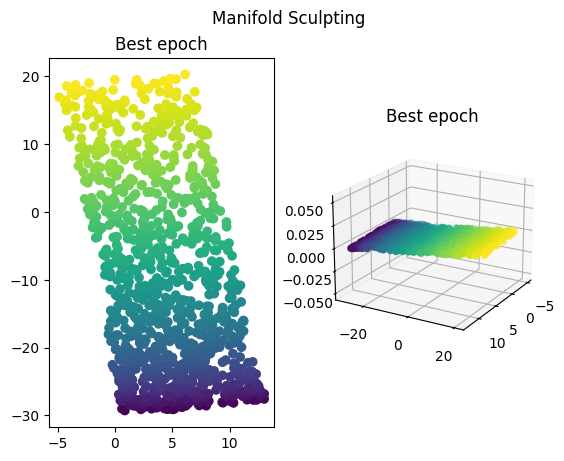

In [7]:
fig = plt.figure()
fig.suptitle('Manifold Sculpting')

ax = fig.add_subplot(121)
ax.scatter(y_ms[:,0],y_ms[:,1],c = phi)
ax.set_title('Best epoch')
ax = fig.add_subplot(122, projection='3d')
ax.set_title('Best epoch')
ax.scatter3D(ms.best_data[:,0],ms.best_data[:,1],ms.best_data[:,2],c=phi)
ax.view_init(elev=20, azim=30)

# plt.savefig("img/manifold_sculpting_result.png")
plt.show()

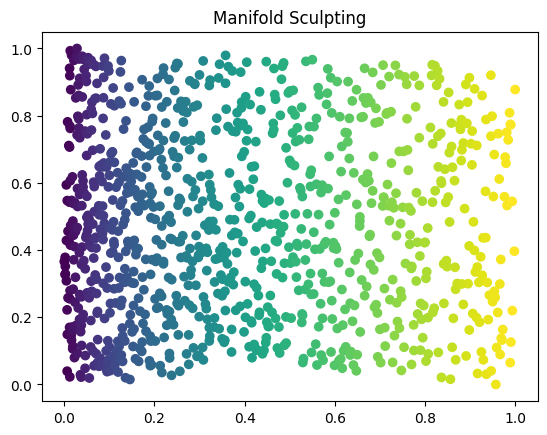

In [8]:
# Center data and put it on principal axes
y = y_ms - np.mean(y_ms,axis=0)

# Compute principal axes
pca = np.linalg.svd(y,full_matrices=False)[2]
y = y @ pca.T

# Scale data[:,[0,1]] using min-max scaling
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y[:,0],y[:,1],c = phi)
plt.title("Manifold Sculpting")
# plt.savefig("img/manifold_sculpting_comparison.png")
plt.show()

Check MSE with the original manifold.

In [10]:
y.shape

(1000, 3)

In [11]:
mse = mean_squared_error(y[:, [0,1]], unroll[:,[3,1]])
mse

np.float64(0.00711794507460562)

---
---

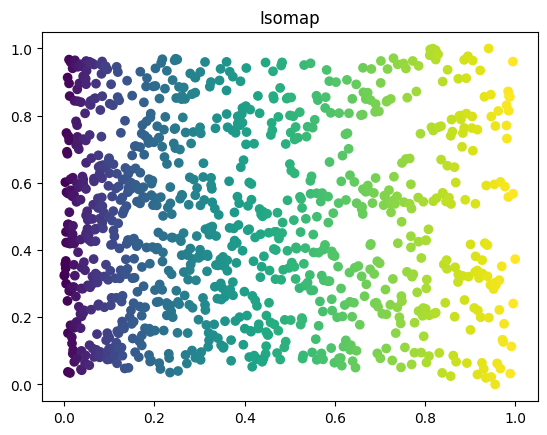

np.float64(0.007107104506231635)

In [12]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2, n_neighbors=n_neighbors)
y_iso = iso.fit_transform(roll)

scaler = MinMaxScaler()
y_iso = scaler.fit_transform(y_iso)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_iso[:,0],y_iso[:,1],c = phi)
plt.title("Isomap")
plt.savefig("img/isomap.png")
plt.show()

mse_iso = mean_squared_error(y_iso, unroll[:,[3,1]])
mse_iso

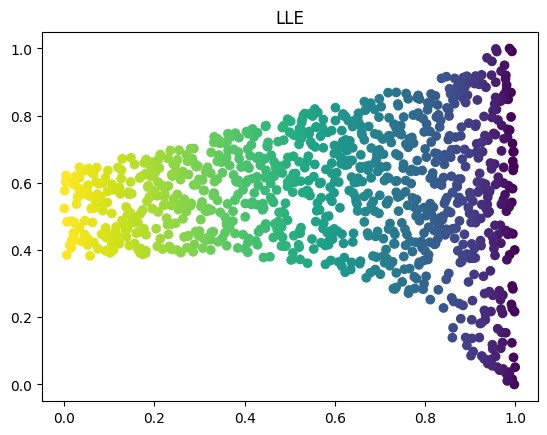

np.float64(0.2800624406038901)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors)
y_lle = lle.fit_transform(roll)

scaler = MinMaxScaler()
y_lle = scaler.fit_transform(y_lle)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_lle[:,0],y_lle[:,1],c = phi)
plt.title("LLE")
plt.savefig("img/lle.png")
plt.show()

mse_lle = mean_squared_error(y_lle, unroll[:,[3,1]])
mse_lle

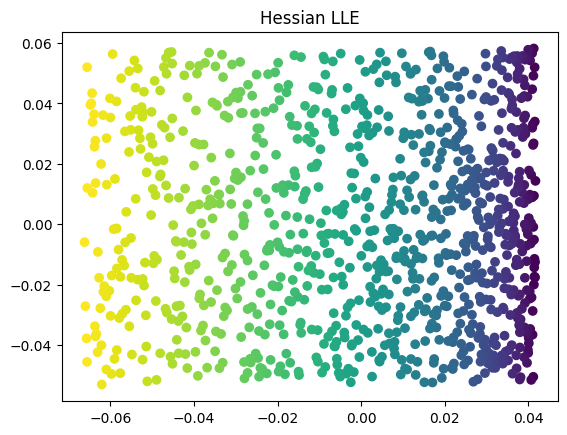

np.float64(0.32355492768559835)

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors, method='hessian')
y_hlle = lle.fit_transform(roll)

scaler = MinMaxScaler()
y_hlle = scaler.fit_transform(y_hlle)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_hlle[:,0],y_hlle[:,1],c = phi)
plt.title("Hessian LLE")
plt.savefig("img/hessian_lle.png")
plt.show()

mse_hlle = mean_squared_error(y_hlle, unroll[:,[3,1]])
mse_hlle

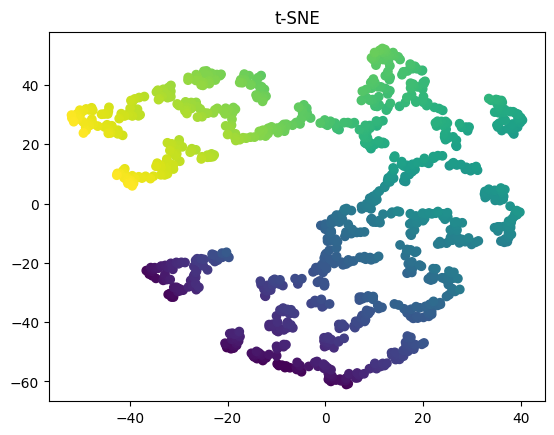

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=n_neighbors)
y_tsne = tsne.fit_transform(roll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_tsne[:,0],y_tsne[:,1],c = phi)
plt.title("t-SNE")
plt.savefig("img/tsne.png")
plt.show()

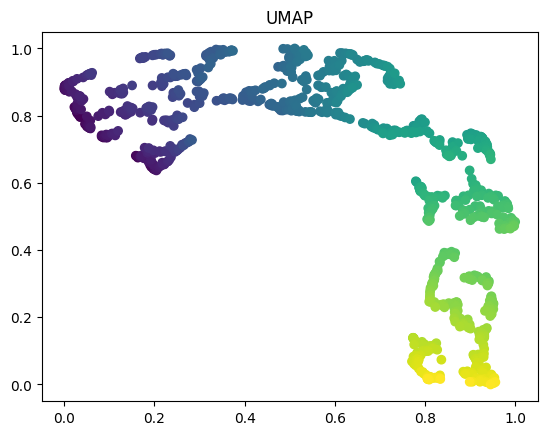

In [16]:
from umap import UMAP

umap = UMAP(n_components=2, n_neighbors=n_neighbors)
y_umap = umap.fit_transform(roll)

scaler = MinMaxScaler()
y_umap = scaler.fit_transform(y_umap)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_umap[:,0],y_umap[:,1],c = phi)
plt.title("UMAP")
plt.savefig("img/umap.png")
plt.show()

---
---

Try on a holed manidold

In [3]:
data = swiss_roll(1000)
r = np.sqrt(data[:,0]**2+data[:,1]**2)
mask = np.logical_and(r < 3, data[:,2] > 3)

data_hole = data[~mask]

roll = data[:,:3].astype(np.float32)
phi = data[:,-1]

hole = data_hole[:,:3].astype(np.float32)
phi_hole = data_hole[:,-1]

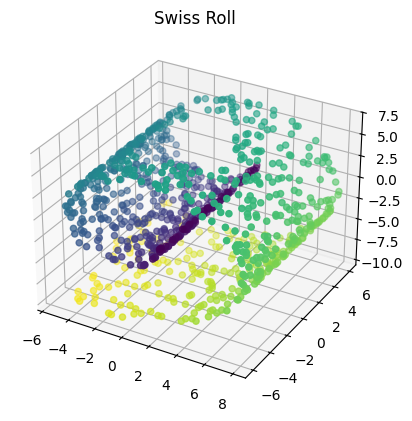

In [4]:
plot_swiss_roll(data_hole)

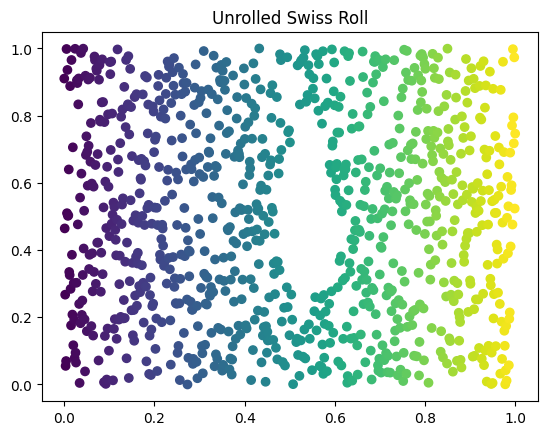

In [5]:
unroll = data_hole.copy()
fig = plt.figure()
# Scale data[:,[3,1]] using min-max scaling
scaler = MinMaxScaler()
unroll[:,[3,1]] = scaler.fit_transform(unroll[:,[3,1]])

# Replot
plt.scatter(unroll[:,3], unroll[:,1], c=unroll[:,3], cmap=plt.cm.viridis)
plt.title("Unrolled Swiss Roll")
plt.savefig("img/unrolled_swiss_roll_hole.png")
plt.show()

In [27]:
# Parameters
n_neighbors = 15

In [28]:
roll = data_hole[:,:3].astype(np.float32)
roll = roll - np.mean(roll,axis=0)
phi = data[:,-1]

In [29]:
ms = ManifoldSculpting(n_neighbors=n_neighbors, sigma=0.98, niter=1000, apply_pca=True, patience=100)

y_ms = ms.fit_transform(roll)

print(f'Final mean error: {ms.last_error:.3e}')
print(f'Best mean error: {ms.best_error:.3e}')

Initial adjustment: 228it [03:56,  1.04s/it]
Main loop:  52%|█████▏    | 519/1000 [05:02<08:28,  1.06s/it] 

Convergence reached by patience


Main loop: 100%|██████████| 1000/1000 [12:52<00:00,  1.29it/s]

Final mean error: 1.332e+01
Best mean error: 1.732e+00


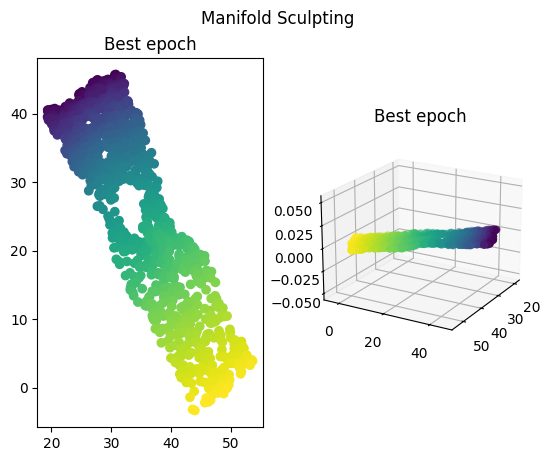

In [30]:
fig = plt.figure()
fig.suptitle('Manifold Sculpting')

ax = fig.add_subplot(121)
ax.scatter(y_ms[:,0],y_ms[:,1],c = phi_hole)
ax.set_title('Best epoch')
ax = fig.add_subplot(122, projection='3d')
ax.set_title('Best epoch')
ax.scatter3D(ms.best_data[:,0],ms.best_data[:,1],ms.best_data[:,2],c=phi_hole)
ax.view_init(elev=20, azim=30)

# plt.savefig("img/manifold_sculpting_result.png")
plt.show()

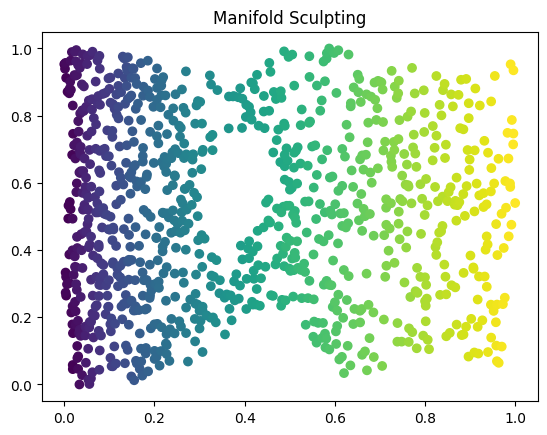

In [31]:
# Center data and put it on principal axes
y = y_ms - np.mean(y_ms,axis=0)

# Compute principal axes
pca = np.linalg.svd(y,full_matrices=False)[2]
y = y @ pca.T

# Scale data[:,[0,1]] using min-max scaling
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y[:,0],y[:,1],c = phi_hole)
plt.title("Manifold Sculpting")
plt.savefig("img/manifold_sculpting_hole_comparison.png")
plt.show()

Check MSE with the original manifold.

In [32]:
mse = mean_squared_error(y[:, [0,1]], unroll[:,[3,1]])
mse

np.float64(0.007834918025098246)

---
---

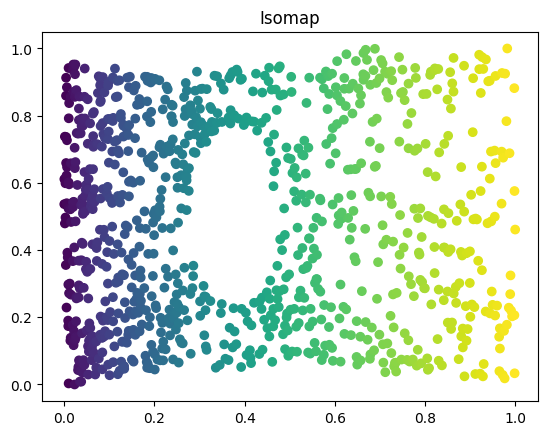

np.float64(0.006963997578761854)

In [18]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2, n_neighbors=n_neighbors)
y_iso = iso.fit_transform(roll)

scaler = MinMaxScaler()
y_iso = scaler.fit_transform(y_iso)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_iso[:,0],y_iso[:,1],c = phi_hole)
plt.title("Isomap")
plt.savefig("img/isomap_hole.png")
plt.show()

mse_iso = mean_squared_error(y_iso, unroll[:,[3,1]])
mse_iso

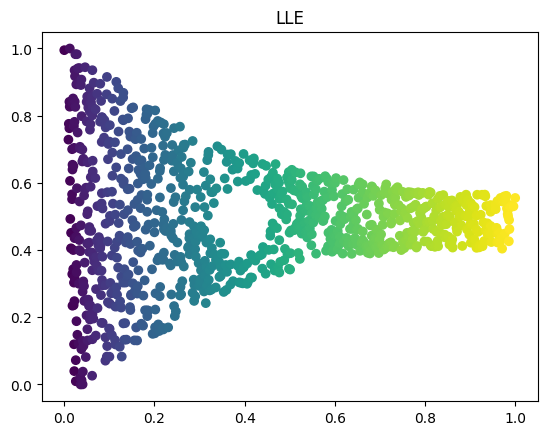

np.float64(0.10945973794157123)

In [19]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors)
y_lle = lle.fit_transform(roll)

scaler = MinMaxScaler()
y_lle = scaler.fit_transform(y_lle)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_lle[:,0],y_lle[:,1],c = phi_hole)
plt.title("LLE")
plt.savefig("img/lle_hole.png")
plt.show()

mse_lle = mean_squared_error(y_lle, unroll[:,[3,1]])
mse_lle

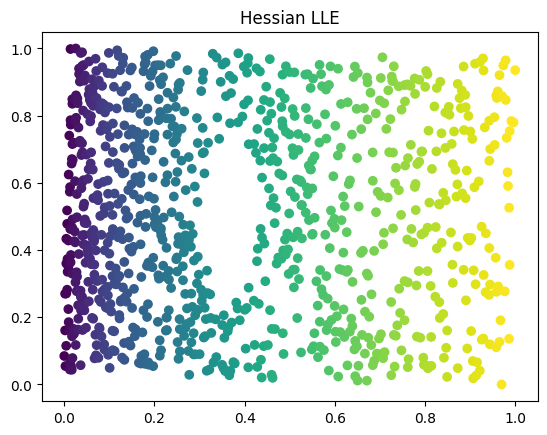

np.float64(0.17871313541942638)

In [20]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors, method='hessian')
y_hlle = lle.fit_transform(roll)

scaler = MinMaxScaler()
y_hlle = scaler.fit_transform(y_hlle)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_hlle[:,0],y_hlle[:,1],c = phi_hole)
plt.title("Hessian LLE")
plt.savefig("img/hessian_lle_hole.png")
plt.show()

mse_hlle = mean_squared_error(y_hlle, unroll[:,[3,1]])
mse_hlle

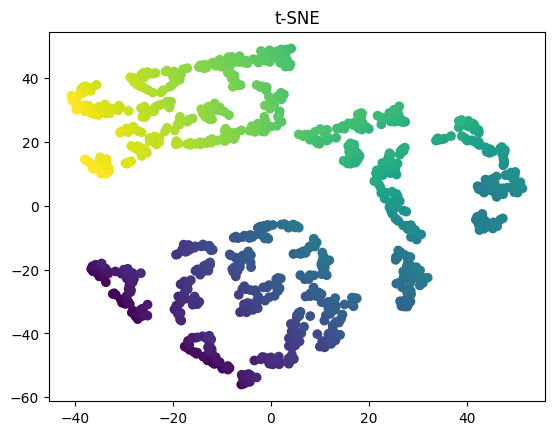

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=n_neighbors)
y_tsne = tsne.fit_transform(roll)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_tsne[:,0],y_tsne[:,1],c = phi_hole)
plt.title("t-SNE")
plt.savefig("img/tsne_hole.png")
plt.show()

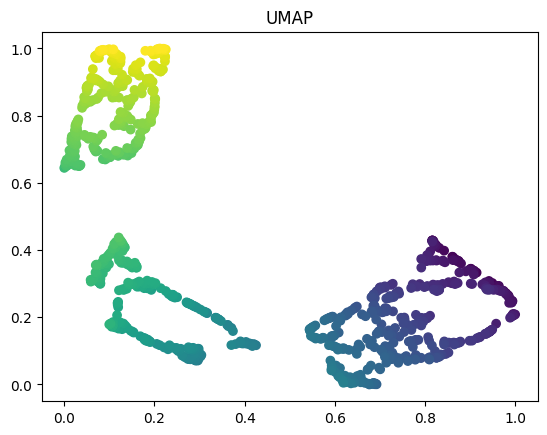

In [22]:
from umap import UMAP

umap = UMAP(n_components=2, n_neighbors=n_neighbors)
y_umap = umap.fit_transform(roll)

scaler = MinMaxScaler()
y_umap = scaler.fit_transform(y_umap)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_umap[:,0],y_umap[:,1],c = phi_hole)
plt.title("UMAP")
plt.savefig("img/umap_hole.png")
plt.show()

---
---

In [17]:
from sklearn.datasets import make_s_curve

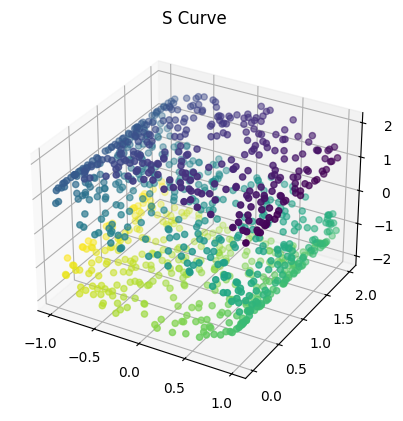

In [18]:
def generate_s_curve(X):
	X, t = make_s_curve(n_samples=1000)
	X = np.column_stack((X, t))
	return X

def plot_s_curve(X):
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	ax.scatter(X[:,0], X[:,1], X[:,2], c=X[:,3], cmap=plt.cm.viridis)
	plt.title("S Curve")
	plt.savefig("img/s_curve.png")
	plt.show()

data = generate_s_curve(1000)
plot_s_curve(data)

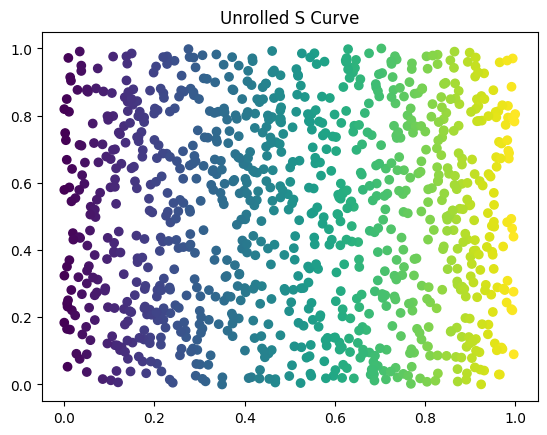

In [19]:
unroll = data.copy()
fig = plt.figure()
# Scale data[:,[3,1]] using min-max scaling
scaler = MinMaxScaler()
unroll[:,[3,1]] = scaler.fit_transform(unroll[:,[3,1]])

# Replot
plt.scatter(unroll[:,3], unroll[:,1], c=unroll[:,3], cmap=plt.cm.viridis)
plt.title("Unrolled S Curve")
# plt.savefig("img/unrolled_s_curve.png")
plt.show()

In [20]:
n_neighbors = 15

In [22]:
curve = data[:,:3].astype(np.float32)
curve = curve - np.mean(curve,axis=0)
phi = data[:,-1]

ms = ManifoldSculpting(n_neighbors=n_neighbors, sigma=0.99, niter=800, apply_pca=True, patience=100)

y_ms = ms.fit_transform(curve)

print(f'Final mean error: {ms.last_error:.3e}')
print(f'Best mean error: {ms.best_error:.3e}')

Initial adjustment: 459it [08:56,  1.17s/it]
Main loop:  70%|███████   | 562/800 [01:54<00:48,  4.93it/s] 

Convergence reached by patience
Final mean error: 1.079e+01
Best mean error: 9.734e-01


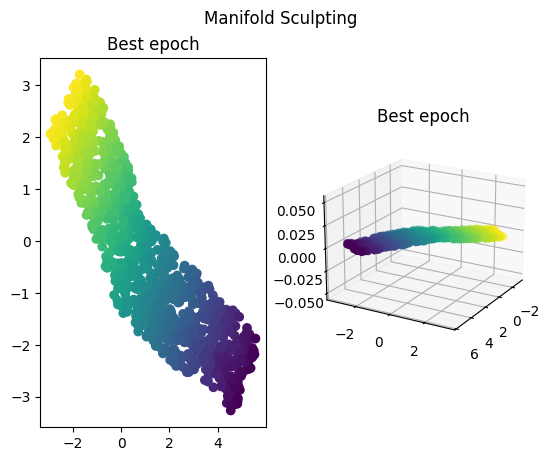

In [23]:
fig = plt.figure()
fig.suptitle('Manifold Sculpting')

ax = fig.add_subplot(121)
ax.scatter(y_ms[:,0],y_ms[:,1],c = phi)
ax.set_title('Best epoch')
ax = fig.add_subplot(122, projection='3d')
ax.set_title('Best epoch')
ax.scatter3D(ms.best_data[:,0],ms.best_data[:,1],ms.best_data[:,2],c=phi)
ax.view_init(elev=20, azim=30)

plt.savefig("img/manifold_sculpting_result_s_curve.png")
plt.show()

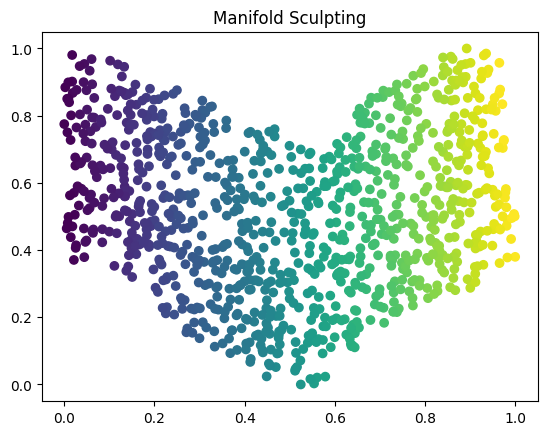

In [24]:
# Center data and put it on principal axes
y = y_ms - np.mean(y_ms,axis=0)

# Compute principal axes
pca = np.linalg.svd(y,full_matrices=False)[2]
y = y @ pca.T

# Scale data[:,[0,1]] using min-max scaling
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y[:,0],y[:,1],c = phi)
plt.title("Manifold Sculpting")
# plt.savefig("img/manifold_sculpting_comparison.png")
plt.show()

In [25]:
mse = mean_squared_error(y[:, [0,1]], unroll[:,[3,1]])
mse

np.float64(0.12689865668485334)